In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
# load data
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ViHSD/train.csv", index_col=False)
dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ViHSD/dev.csv", index_col=False)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ViHSD/test.csv", index_col=False)

In [14]:
dfs = [train, dev, test]
full_comments = pd.concat(dfs, join = 'outer')
full_comments

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
...,...,...
6675,Nghe cũng được. Nhưng vẫn cày views,0
6676,Pha team up căng cực đến từ vị trí ông chủ đầm...,0
6677,Thanh Nhường sao m đọc đc cmt của t thế tiên s...,0
6678,"Đúng rồi, nhìn có ria mép , với mặt giống đàn ...",0


In [24]:
full_comments['label_id'] = full_comments['label_id'].astype(int)

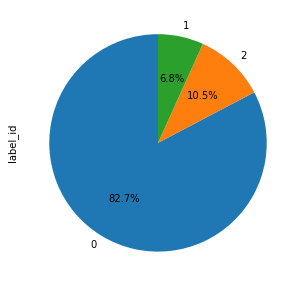

In [35]:
full_comments['label_id'].value_counts().plot(kind='pie', startangle=90, figsize=(5,5), autopct='%1.1f%%')

In [43]:
label_0 = full_comments.loc[full_comments['label_id'] == 0]
label_0

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
5,Coronavirus is manmade,0
6,Đố chúng m nhận ra ai,0
...,...,...
6675,Nghe cũng được. Nhưng vẫn cày views,0
6676,Pha team up căng cực đến từ vị trí ông chủ đầm...,0
6677,Thanh Nhường sao m đọc đc cmt của t thế tiên s...,0
6678,"Đúng rồi, nhìn có ria mép , với mặt giống đàn ...",0


In [45]:
label_1 = full_comments.loc[full_comments['label_id'] == 1]
label_1

,free_text,label_id
7,Lúp lúp như chó .,1
18,Dạy bơi cho cá. Bơi thì đương nhiên nó bơi đượ...,1
38,Ý thức còn ít hơn cả số tiền trong túi t,1
47,xxx video 🔞,1
58,Đấu khẩu - Chim lợn 👍,1
...,...,...
6604,Clm :))),1
6634,Khi bạn muốn bợ đít ai đó nhưng bạn không có n...,1
6637,Tranh cho va bong sa ban gai cung kg gai trai ...,1
6660,Khẩu nghiệp quá. Con cháu nghe xấu hổ chết.,1


In [46]:
label_2 = full_comments.loc[full_comments['label_id'] == 2]
label_2

,free_text,label_id
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
9,"Thế mà mình nói mấy thằng bắc kì, bọn đó lại b...",2
16,Loại này cho dựa cột thôi chứ độ thế nào,2
19,Ủa chứ bữa xin lỗi khóc tế om xòm mà giờ chửi ...,2
...,...,...
6626,Sai cái dmm phải khoá mõm mày lại,2
6635,"Chơi với thằng nào cũng được,trừ thằng tàu cộn...",2
6650,Hải Yến đéo care cmt ăn lốn màu à con điên,2
6659,Cám ơn đảng. Cám ơn nhà nc 😏,2


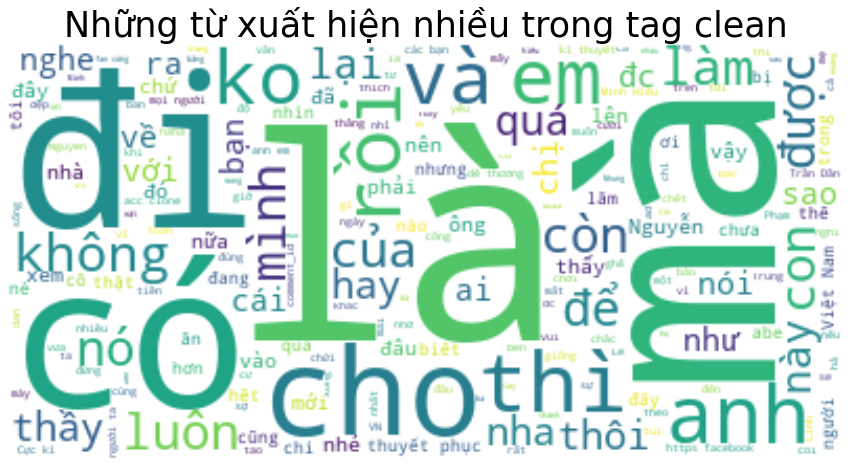

In [52]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(i for i in map(str,label_0.free_text))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Những từ xuất hiện nhiều trong tag clean", fontsize=35)
plt.axis("off")
plt.show()

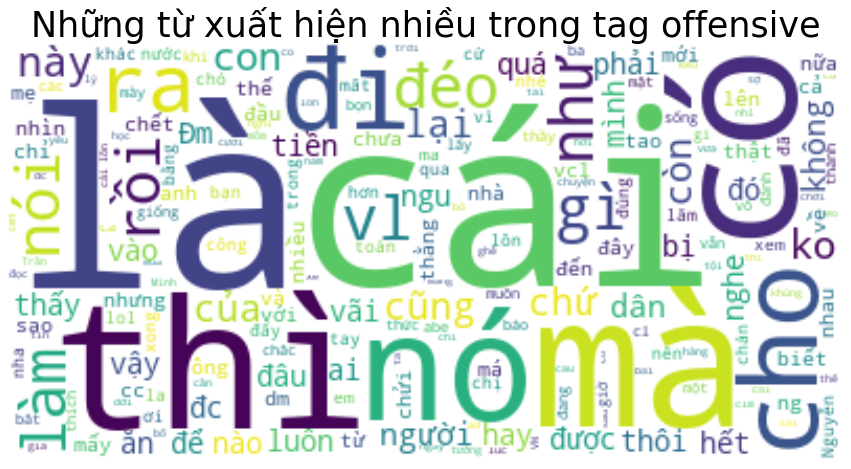

In [53]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(i for i in map(str,label_1.free_text))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Những từ xuất hiện nhiều trong tag offensive", fontsize=35)
plt.axis("off")
plt.show()

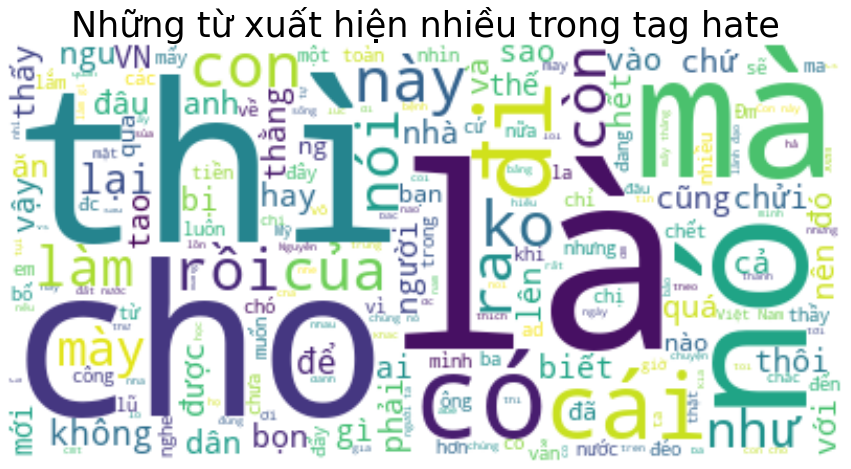

In [54]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = " ".join(i for i in map(str,label_2.free_text))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Những từ xuất hiện nhiều trong tag hate", fontsize=35)
plt.axis("off")
plt.show()